In [91]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [92]:
df = pd.read_csv(r'./time_series_covid_19_confirmed.csv')
#df = pd.read_csv(r'./time_series_covid_19_recovered.csv')

In [93]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/5/2020,3/6/2020,3/7/2020,3/8/2020,3/9/2020,3/10/2020,3/11/2020,3/12/2020,3/13/2020,3/14/2020
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


In [94]:
df.drop(['Province/State','Country/Region','Lat','Long'],axis=1,inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 53 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   1/22/2020  442 non-null    int64
 1   1/23/2020  442 non-null    int64
 2   1/24/2020  442 non-null    int64
 3   1/25/2020  442 non-null    int64
 4   1/26/2020  442 non-null    int64
 5   1/27/2020  442 non-null    int64
 6   1/28/2020  442 non-null    int64
 7   1/29/2020  442 non-null    int64
 8   1/30/2020  442 non-null    int64
 9   1/31/2020  442 non-null    int64
 10  2/1/2020   442 non-null    int64
 11  2/2/2020   442 non-null    int64
 12  2/3/2020   442 non-null    int64
 13  2/4/2020   442 non-null    int64
 14  2/5/2020   442 non-null    int64
 15  2/6/2020   442 non-null    int64
 16  2/7/2020   442 non-null    int64
 17  2/8/2020   442 non-null    int64
 18  2/9/2020   442 non-null    int64
 19  2/10/2020  442 non-null    int64
 20  2/11/2020  442 non-null    int64
 21  2/12/2020  442 n

In [96]:
dataset = df.copy()
X = np.asarray(dataset.drop('3/14/2020', axis=1))
y = np.asarray(dataset['3/14/2020'])

In [97]:
numDims = X_normalized.shape[1]
dnnModel = tf.keras.Sequential([    
    layers.Dense(16, activation='relu', input_shape=(numDims,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(126, activation='relu'),
    layers.Dense(160, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(0.0001)
#optimizer = tf.keras.optimizers.Adam(0.001)

dnnModel.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])


In [98]:
dnnModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 16)                848       
                                                                 
 dense_61 (Dense)            (None, 16)                272       
                                                                 
 dense_62 (Dense)            (None, 126)               2142      
                                                                 
 dense_63 (Dense)            (None, 160)               20320     
                                                                 
 dense_64 (Dense)            (None, 10)                1610      
                                                                 
 dense_65 (Dense)            (None, 1)                 11        
                                                                 
Total params: 25203 (98.45 KB)
Trainable params: 2520

In [99]:
EPOCHS =500

history = dnnModel.fit(X, y,epochs=EPOCHS, validation_split = 0.2)


Epoch 1/500
12/12 [==============================] - 0s 9ms/step - loss: 17913104.0000 - mae: 466.1430 - mse: 17913104.0000 - val_loss: 14672.9326 - val_mae: 13.6730 - val_mse: 14672.9326
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 16559982.0000 - mae: 450.5003 - mse: 16559982.0000 - val_loss: 14440.4932 - val_mae: 13.5681 - val_mse: 14440.4932
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 15443151.0000 - mae: 439.2818 - mse: 15443151.0000 - val_loss: 14223.3105 - val_mae: 13.4695 - val_mse: 14223.3105
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 14398074.0000 - mae: 427.0807 - mse: 14398074.0000 - val_loss: 14030.4707 - val_mae: 13.3813 - val_mse: 14030.4707
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 13665218.0000 - mae: 418.8653 - mse: 13665218.0000 - val_loss: 13849.8408 - val_mae: 13.2985 - val_mse: 13849.8408
Epoch 6/500
12/12 [==============================] - 0s 2ms/

12/12 [==============================] - 0s 2ms/step - loss: 745450.1875 - mae: 129.2149 - mse: 745450.1875 - val_loss: 7475.5190 - val_mae: 9.9184 - val_mse: 7475.5190
Epoch 46/500
12/12 [==============================] - 0s 2ms/step - loss: 698190.2500 - mae: 119.2343 - mse: 698190.2500 - val_loss: 7304.8232 - val_mae: 9.8127 - val_mse: 7304.8232
Epoch 47/500
12/12 [==============================] - 0s 2ms/step - loss: 679306.6875 - mae: 121.7953 - mse: 679306.6875 - val_loss: 7182.2417 - val_mae: 9.7339 - val_mse: 7182.2417
Epoch 48/500
12/12 [==============================] - 0s 2ms/step - loss: 642129.5625 - mae: 114.9968 - mse: 642129.5625 - val_loss: 6988.1396 - val_mae: 9.6095 - val_mse: 6988.1396
Epoch 49/500
12/12 [==============================] - 0s 2ms/step - loss: 609495.3125 - mae: 109.5589 - mse: 609495.3125 - val_loss: 6717.5229 - val_mae: 9.4320 - val_mse: 6717.5229
Epoch 50/500
12/12 [==============================] - 0s 2ms/step - loss: 610036.0625 - mae: 113.5608 -

12/12 [==============================] - 0s 2ms/step - loss: 95102.1406 - mae: 49.1805 - mse: 95102.1406 - val_loss: 2340.5950 - val_mae: 5.8560 - val_mse: 2340.5950
Epoch 91/500
12/12 [==============================] - 0s 2ms/step - loss: 128817.5859 - mae: 55.0835 - mse: 128817.5859 - val_loss: 1945.8722 - val_mae: 5.4256 - val_mse: 1945.8722
Epoch 92/500
12/12 [==============================] - 0s 2ms/step - loss: 113814.2969 - mae: 52.7677 - mse: 113814.2969 - val_loss: 1956.2837 - val_mae: 5.4283 - val_mse: 1956.2837
Epoch 93/500
12/12 [==============================] - 0s 2ms/step - loss: 85292.6719 - mae: 44.6183 - mse: 85292.6719 - val_loss: 1904.9779 - val_mae: 5.3608 - val_mse: 1904.9779
Epoch 94/500
12/12 [==============================] - 0s 2ms/step - loss: 100087.7422 - mae: 49.6258 - mse: 100087.7422 - val_loss: 2047.8761 - val_mae: 5.5099 - val_mse: 2047.8761
Epoch 95/500
12/12 [==============================] - 0s 2ms/step - loss: 123483.6797 - mae: 54.7869 - mse: 1234

12/12 [==============================] - 0s 2ms/step - loss: 40952.0234 - mae: 35.5691 - mse: 40952.0234 - val_loss: 1290.0632 - val_mae: 4.4221 - val_mse: 1290.0632
Epoch 136/500
12/12 [==============================] - 0s 2ms/step - loss: 37369.2031 - mae: 33.8809 - mse: 37369.2031 - val_loss: 1392.9753 - val_mae: 4.5681 - val_mse: 1392.9753
Epoch 137/500
12/12 [==============================] - 0s 2ms/step - loss: 38794.1953 - mae: 34.1943 - mse: 38794.1953 - val_loss: 1203.8236 - val_mae: 4.3019 - val_mse: 1203.8236
Epoch 138/500
12/12 [==============================] - 0s 2ms/step - loss: 43969.2109 - mae: 35.5065 - mse: 43969.2109 - val_loss: 1328.9092 - val_mae: 4.4796 - val_mse: 1328.9092
Epoch 139/500
12/12 [==============================] - 0s 2ms/step - loss: 28996.2520 - mae: 29.3469 - mse: 28996.2520 - val_loss: 1028.4818 - val_mae: 4.0357 - val_mse: 1028.4818
Epoch 140/500
12/12 [==============================] - 0s 2ms/step - loss: 55662.0508 - mae: 35.9136 - mse: 55662.

Epoch 181/500
12/12 [==============================] - 0s 2ms/step - loss: 42056.3242 - mae: 28.6840 - mse: 42056.3242 - val_loss: 798.4513 - val_mae: 3.5891 - val_mse: 798.4513
Epoch 182/500
12/12 [==============================] - 0s 2ms/step - loss: 29735.0234 - mae: 27.8275 - mse: 29735.0234 - val_loss: 893.9899 - val_mae: 3.7608 - val_mse: 893.9899
Epoch 183/500
12/12 [==============================] - 0s 3ms/step - loss: 28305.4648 - mae: 25.0713 - mse: 28305.4648 - val_loss: 775.4091 - val_mae: 3.5538 - val_mse: 775.4091
Epoch 184/500
12/12 [==============================] - 0s 2ms/step - loss: 37888.8711 - mae: 28.0729 - mse: 37888.8711 - val_loss: 1055.2589 - val_mae: 4.0118 - val_mse: 1055.2589
Epoch 185/500
12/12 [==============================] - 0s 2ms/step - loss: 34335.1094 - mae: 28.6703 - mse: 34335.1094 - val_loss: 816.7252 - val_mae: 3.6248 - val_mse: 816.7252
Epoch 186/500
12/12 [==============================] - 0s 2ms/step - loss: 32341.2129 - mae: 28.4033 - mse: 

12/12 [==============================] - 0s 2ms/step - loss: 20472.0293 - mae: 24.1816 - mse: 20472.0293 - val_loss: 735.3956 - val_mae: 3.4763 - val_mse: 735.3956
Epoch 228/500
12/12 [==============================] - 0s 2ms/step - loss: 22296.7188 - mae: 23.5337 - mse: 22296.7188 - val_loss: 812.7690 - val_mae: 3.6299 - val_mse: 812.7690
Epoch 229/500
12/12 [==============================] - 0s 2ms/step - loss: 20451.2012 - mae: 22.7931 - mse: 20451.2012 - val_loss: 696.1743 - val_mae: 3.3962 - val_mse: 696.1743
Epoch 230/500
12/12 [==============================] - 0s 2ms/step - loss: 25830.0234 - mae: 25.5317 - mse: 25830.0234 - val_loss: 835.7208 - val_mae: 3.6787 - val_mse: 835.7208
Epoch 231/500
12/12 [==============================] - 0s 2ms/step - loss: 32600.7988 - mae: 23.6961 - mse: 32600.7988 - val_loss: 686.3063 - val_mae: 3.3783 - val_mse: 686.3063
Epoch 232/500
12/12 [==============================] - 0s 2ms/step - loss: 22011.2754 - mae: 25.3288 - mse: 22011.2754 - val

12/12 [==============================] - 0s 2ms/step - loss: 18979.8848 - mae: 21.1839 - mse: 18979.8848 - val_loss: 713.4418 - val_mae: 3.4278 - val_mse: 713.4418
Epoch 274/500
12/12 [==============================] - 0s 3ms/step - loss: 19303.3301 - mae: 21.3080 - mse: 19303.3301 - val_loss: 746.8884 - val_mae: 3.4916 - val_mse: 746.8884
Epoch 275/500
12/12 [==============================] - 0s 2ms/step - loss: 28861.5547 - mae: 21.9450 - mse: 28861.5547 - val_loss: 715.9830 - val_mae: 3.4254 - val_mse: 715.9830
Epoch 276/500
12/12 [==============================] - 0s 2ms/step - loss: 13816.8779 - mae: 20.5141 - mse: 13816.8779 - val_loss: 699.2926 - val_mae: 3.3809 - val_mse: 699.2926
Epoch 277/500
12/12 [==============================] - 0s 2ms/step - loss: 17732.7188 - mae: 20.9075 - mse: 17732.7188 - val_loss: 645.4402 - val_mae: 3.2823 - val_mse: 645.4402
Epoch 278/500
12/12 [==============================] - 0s 2ms/step - loss: 25708.9570 - mae: 22.8417 - mse: 25708.9570 - val

12/12 [==============================] - 0s 2ms/step - loss: 18572.9043 - mae: 18.6390 - mse: 18572.9043 - val_loss: 639.2928 - val_mae: 3.2337 - val_mse: 639.2928
Epoch 320/500
12/12 [==============================] - 0s 2ms/step - loss: 14150.2227 - mae: 18.0414 - mse: 14150.2227 - val_loss: 674.7308 - val_mae: 3.2853 - val_mse: 674.7308
Epoch 321/500
12/12 [==============================] - 0s 2ms/step - loss: 17253.7598 - mae: 21.0191 - mse: 17253.7598 - val_loss: 614.6722 - val_mae: 3.1773 - val_mse: 614.6722
Epoch 322/500
12/12 [==============================] - 0s 2ms/step - loss: 19310.9922 - mae: 18.7519 - mse: 19310.9922 - val_loss: 688.0991 - val_mae: 3.3168 - val_mse: 688.0991
Epoch 323/500
12/12 [==============================] - 0s 2ms/step - loss: 21345.6211 - mae: 19.6391 - mse: 21345.6211 - val_loss: 627.1362 - val_mae: 3.1811 - val_mse: 627.1362
Epoch 324/500
12/12 [==============================] - 0s 2ms/step - loss: 24903.3262 - mae: 21.9972 - mse: 24903.3262 - val

12/12 [==============================] - 0s 3ms/step - loss: 22372.4570 - mae: 18.5372 - mse: 22372.4570 - val_loss: 468.7429 - val_mae: 2.7881 - val_mse: 468.7429
Epoch 366/500
12/12 [==============================] - 0s 2ms/step - loss: 18752.3965 - mae: 19.0923 - mse: 18752.3965 - val_loss: 623.6594 - val_mae: 3.1389 - val_mse: 623.6594
Epoch 367/500
12/12 [==============================] - 0s 2ms/step - loss: 14795.4727 - mae: 17.2326 - mse: 14795.4727 - val_loss: 546.0224 - val_mae: 2.9655 - val_mse: 546.0224
Epoch 368/500
12/12 [==============================] - 0s 2ms/step - loss: 23629.9062 - mae: 18.3383 - mse: 23629.9062 - val_loss: 580.7379 - val_mae: 3.0402 - val_mse: 580.7379
Epoch 369/500
12/12 [==============================] - 0s 2ms/step - loss: 13999.0117 - mae: 17.5211 - mse: 13999.0117 - val_loss: 602.1309 - val_mae: 3.0975 - val_mse: 602.1309
Epoch 370/500
12/12 [==============================] - 0s 2ms/step - loss: 12351.5752 - mae: 15.8531 - mse: 12351.5752 - val

12/12 [==============================] - 0s 2ms/step - loss: 17319.8730 - mae: 16.6816 - mse: 17319.8730 - val_loss: 467.3818 - val_mae: 2.7692 - val_mse: 467.3818
Epoch 412/500
12/12 [==============================] - 0s 2ms/step - loss: 20300.4004 - mae: 18.0176 - mse: 20300.4004 - val_loss: 656.4789 - val_mae: 3.1975 - val_mse: 656.4789
Epoch 413/500
12/12 [==============================] - 0s 2ms/step - loss: 9318.6729 - mae: 15.1358 - mse: 9318.6729 - val_loss: 605.5660 - val_mae: 3.0869 - val_mse: 605.5660
Epoch 414/500
12/12 [==============================] - 0s 2ms/step - loss: 9595.6758 - mae: 14.2362 - mse: 9595.6758 - val_loss: 649.4780 - val_mae: 3.1829 - val_mse: 649.4780
Epoch 415/500
12/12 [==============================] - 0s 2ms/step - loss: 19382.5781 - mae: 16.9999 - mse: 19382.5781 - val_loss: 506.8795 - val_mae: 2.8607 - val_mse: 506.8795
Epoch 416/500
12/12 [==============================] - 0s 2ms/step - loss: 11464.1533 - mae: 16.0434 - mse: 11464.1533 - val_los

12/12 [==============================] - 0s 2ms/step - loss: 20941.6992 - mae: 19.0321 - mse: 20941.6992 - val_loss: 534.4485 - val_mae: 2.9442 - val_mse: 534.4485
Epoch 458/500
12/12 [==============================] - 0s 2ms/step - loss: 10729.7168 - mae: 15.1183 - mse: 10729.7168 - val_loss: 542.1121 - val_mae: 2.9598 - val_mse: 542.1121
Epoch 459/500
12/12 [==============================] - 0s 2ms/step - loss: 10484.6553 - mae: 14.8406 - mse: 10484.6553 - val_loss: 551.6387 - val_mae: 2.9801 - val_mse: 551.6387
Epoch 460/500
12/12 [==============================] - 0s 2ms/step - loss: 15003.8105 - mae: 15.5957 - mse: 15003.8105 - val_loss: 588.8531 - val_mae: 3.0713 - val_mse: 588.8531
Epoch 461/500
12/12 [==============================] - 0s 2ms/step - loss: 14861.6562 - mae: 15.9083 - mse: 14861.6562 - val_loss: 551.4200 - val_mae: 2.9873 - val_mse: 551.4200
Epoch 462/500
12/12 [==============================] - 0s 2ms/step - loss: 15882.1250 - mae: 16.5136 - mse: 15882.1250 - val

In [100]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
490,14660.000000,14.349177,14660.000000,528.383911,2.965139,528.383911,490
491,7540.446289,12.742208,7540.446289,630.421143,3.183329,630.421143,491
492,14879.713867,16.100460,14879.713867,436.371460,2.770349,436.371460,492
493,16998.285156,16.900276,16998.285156,597.099182,3.108988,597.099182,493
494,13308.807617,14.548008,13308.807617,534.985413,2.991334,534.985413,494
495,5923.549805,12.021637,5923.549805,634.635925,3.194454,634.635925,495
496,19142.900391,17.563820,19142.900391,437.479065,2.780525,437.479065,496
497,15562.069336,14.764207,15562.069336,499.667145,2.916297,499.667145,497
498,5513.680176,12.721201,5513.680176,640.441650,3.227393,640.441650,498
499,17282.853516,18.135775,17282.853516,548.144897,3.023908,548.144897,499


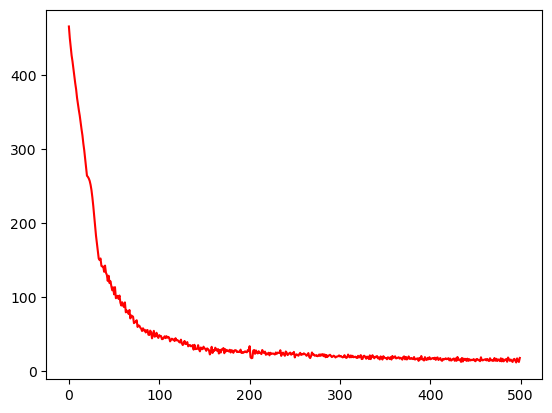

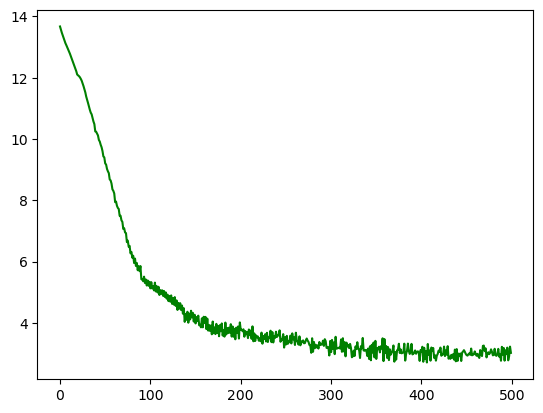

In [101]:
plt.plot(hist['mae'],color='red')
plt.show()
plt.plot(hist['val_mae'],color='green')
plt.show()


In [121]:
y_pred = dnnModel.predict(X)
y_pred
idx = np.random.randint(1,len(y))
print('Index = ',idx,'  Predicted::',np.round(y_pred[idx]),'  Actual::',y[idx])

14/14 [==============================] - 0s 485us/step
Index =  160   Predicted:: [1323.]   Actual:: 1356


In [125]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 12.225767571428513
